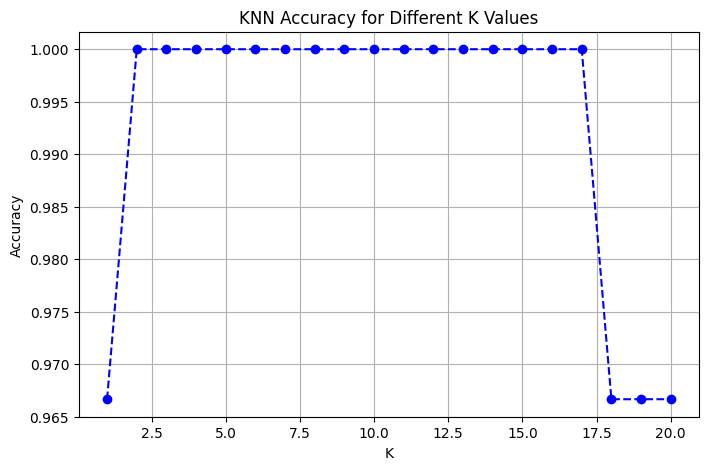

Best K: 2
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



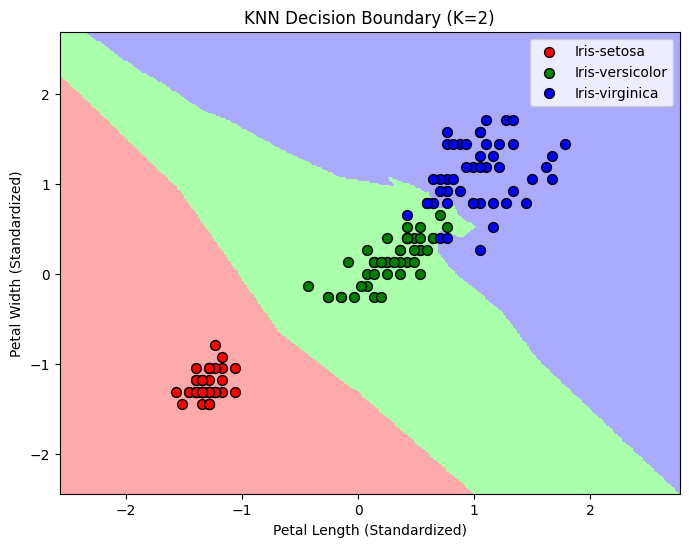

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Load dataset
df = pd.read_csv('Iris.csv')  # <-- Corrected file path for local environment

# Drop unnecessary columns (Id)
df.drop(['Id'], axis=1, inplace=True)

# Features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Test different values of K
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Choose best K (e.g., highest accuracy)
best_k = k_range[np.argmax(accuracies)]
print(f"Best K: {best_k}")

# Final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))

# Visualization of decision boundary (using 2 features for simplicity)
features = ['PetalLengthCm', 'PetalWidthCm']
X_vis = df[features]
y_vis = df['Species']

# Encode labels numerically for plotting
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)

# Normalize the two features
X_vis_scaled = StandardScaler().fit_transform(X_vis)

# Train-test split on visual data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis_encoded, test_size=0.2, random_state=42)

# Train model for visualization
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Mesh grid for decision boundary
h = .02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
for i, class_label in enumerate(np.unique(y_vis_encoded)):
    plt.scatter(X_vis_scaled[y_vis_encoded == class_label, 0],
                X_vis_scaled[y_vis_encoded == class_label, 1],
                c=cmap_bold[i],
                label=le.inverse_transform([class_label])[0],
                edgecolor='k', s=50)

plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.legend()
plt.show()